# Importing Libraries

                                                            emotion Recognition 

                                                                14 Jul 2025

                                                              shiva chaudhary

I am going to build a audio emotion detection classifier. 

Speech Emotion detection (SER) is an act of attempting to recognize female emotion and affective states from speech. 

I plan to create a speech and emotion recognition of harsh words, screaming, crying, stress signals and asking for help signs. so, my model will predict if the person is showing such signs. This is a prototype model and I think i will not get enough time to tuning of hyperparameters. It needs to be done for better model accuracy and classfication. 

In [18]:
import pandas as pd 
import numpy as np

# for creating paths 
import os 
import sys

    # librosa is python library for analyzing audio and music. 
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pylab as plt
    # Data prepration
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

    # to play the audio files
from IPython.display import Audio 
import keras 
    
    # it autommatically lowers learning rate if models stop improving 
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from keras.callbacks import ModelCheckpoint
    
    #ignoring. warningns
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [19]:
scream =  "Converted_Separately"
Ravdess = "ravdess/audio_speech_actors_01-24/"
nepali_dataset_asr = "nepali/without_samsad_cv_included"
nepali_tts = "ne_np_female/wavs"

            # 1. Ravdess dataframe 
I get to know from the official website of Ravdess that, syntax of full .wav file
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

so here's example of an audio filename. 03-01-01-01-01-01-01.wav. This means the meta data for the audio is 
- audio-only(03)
- speech(01)
- neutral(01)
- normal(01)
- statement[0](01)
- repetation(01)
- actor(01)

In [20]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    # as i need only female voice only 
    female_actor = int(dir.split('_')[1])
    # as their are 24 different actors in our previous directory
    # we need to extract files for each actor.
    if female_actor % 2 == 0:
    
        actor = os.listdir(Ravdess + dir)
        for file in actor:
            part = file.split('.')[0]
            part = part.split('-')
            # third part in each file represents the emotion associated to that file.
            file_emotion.append(int(part[2]))
            file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    angry  ravdess/audio_speech_actors_01-24/Actor_16/03-...
1     fear  ravdess/audio_speech_actors_01-24/Actor_16/03-...
2     fear  ravdess/audio_speech_actors_01-24/Actor_16/03-...
3    angry  ravdess/audio_speech_actors_01-24/Actor_16/03-...
4  disgust  ravdess/audio_speech_actors_01-24/Actor_16/03-...

    # 2. Scream and non scream dataset 
This dataset has scream and non scream classified and has total 3128 rows. 

In [21]:
scream_dataset = os.listdir(scream)
    # to store the file emotion and file path
file_emotion = []
file_path = []

for dir in scream_dataset:
    file = os.listdir(scream + '/' + dir)
    for i in file:
        file_emotion.append(dir)
        file_path.append(scream + '/' + dir + '/' + i)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
path_df = pd.DataFrame(file_path, columns = ['Path'])

scream_nonscream = pd.concat([emotion_df, path_df], axis=1)
scream_nonscream.head()


Emotions                                  Path
0   scream  Converted_Separately/scream/1078.wav
1   scream  Converted_Separately/scream/1044.wav
2   scream  Converted_Separately/scream/1050.wav
3   scream   Converted_Separately/scream/249.wav
4   scream   Converted_Separately/scream/275.wav

In [22]:
scream_nonscream.shape

(3128, 2)

    # nepali_dataset_asr dataframe


In [23]:
emotion_path = []
emotion = []
nepali_dataset = os.listdir(nepali_dataset_asr)
for file in nepali_dataset:
    emotion.append('nepali')
    emotion_path.append(nepali_dataset_asr + '/' + file)

emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(emotion_path, columns=['Path'])
nepali_asr = pd.concat([emotion_df, path_df], axis=1)
nepali_asr.head()

Emotions                                               Path
0   nepali  nepali/without_samsad_cv_included/common_voice...
1   nepali  nepali/without_samsad_cv_included/nep_0258_204...
2   nepali  nepali/without_samsad_cv_included/common_voice...
3   nepali  nepali/without_samsad_cv_included/nep_3960_395...
4   nepali  nepali/without_samsad_cv_included/common_voice...

    # nepali tts

In [24]:
emotion_path = []
emotion = []
nepali_dataset = os.listdir(nepali_tts)
for file in nepali_dataset:
    emotion.append('nepali')
    emotion_path.append(nepali_tts + '/' + file)

emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(emotion_path, columns=['Path'])
nepali_tt = pd.concat([emotion_df, path_df], axis=1)
nepali_tt.head()

Emotions                                       Path
0   nepali  ne_np_female/wavs/nep_0258_2044831682.wav
1   nepali  ne_np_female/wavs/nep_3960_3951927264.wav
2   nepali  ne_np_female/wavs/nep_0283_8671851523.wav
3   nepali  ne_np_female/wavs/nep_6329_2604883215.wav
4   nepali  ne_np_female/wavs/nep_0546_4710635421.wav

    # concat all the dataframe into one

In [11]:
df = pd.concat([Ravdess_df, scream_nonscream, nepali_asr, nepali_tt], axis=0)
df.shape

(9423, 2)

In [12]:
df.head()

Emotions                                               Path
0    angry  ravdess/audio_speech_actors_01-24/Actor_16/03-...
1     fear  ravdess/audio_speech_actors_01-24/Actor_16/03-...
2     fear  ravdess/audio_speech_actors_01-24/Actor_16/03-...
3    angry  ravdess/audio_speech_actors_01-24/Actor_16/03-...
4  disgust  ravdess/audio_speech_actors_01-24/Actor_16/03-...

    # Data Visualizations and Exploration
***NOTE: We need also visualization of types and counts of the emotion***
we can also plot waveplots and spectogram for audio signals.
- waveplots is the loudness of the audio at a given time
- spectograms is a visual representation of spectrum of frequencies

In [25]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(12, 7))
    plt.title(f'Waveplot for audio with {e} emotion', fontsize=18)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f'Spectogram for audio with {e} emotion', fontsize=18)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


    # visualizations of each emotion using waveshow and spectogram 

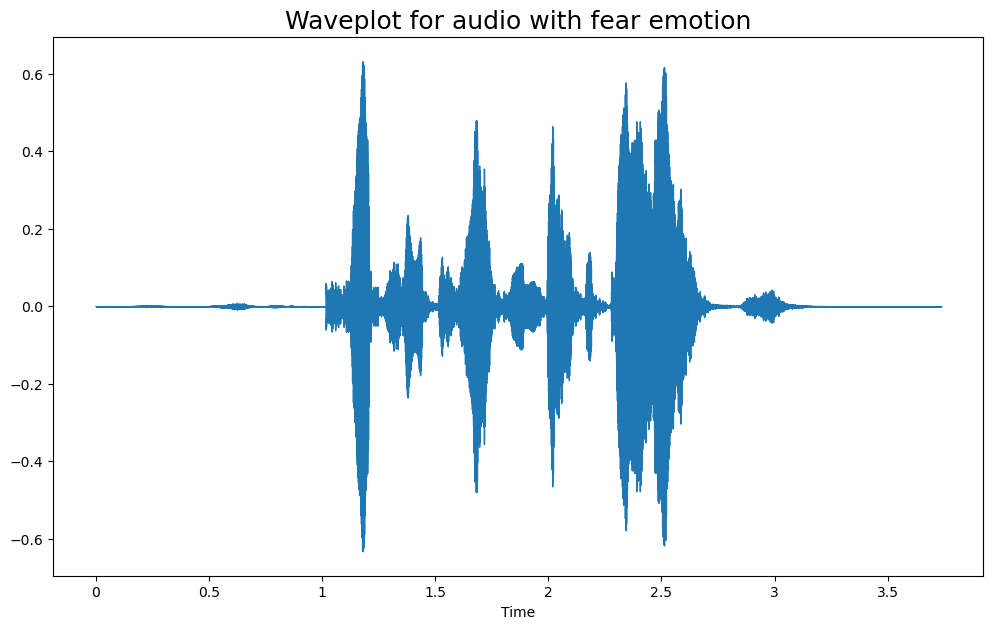

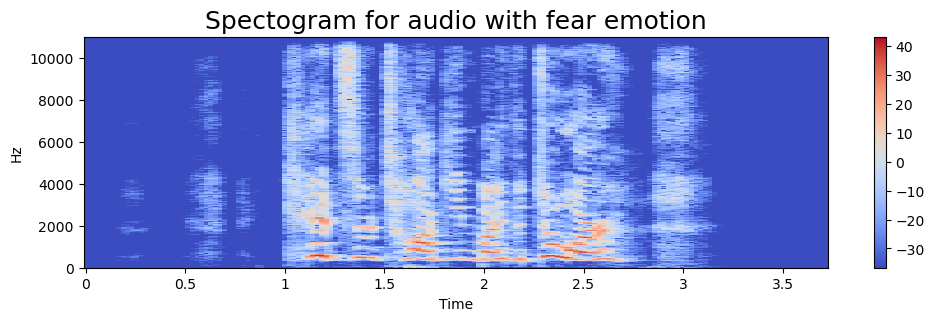

In [26]:
emotion = 'fear'
path = np.array(df.Path[ df.Emotions == emotion])[1]
    # load the audio frame as y and sampling rate as sampling_rate in librosa.load
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

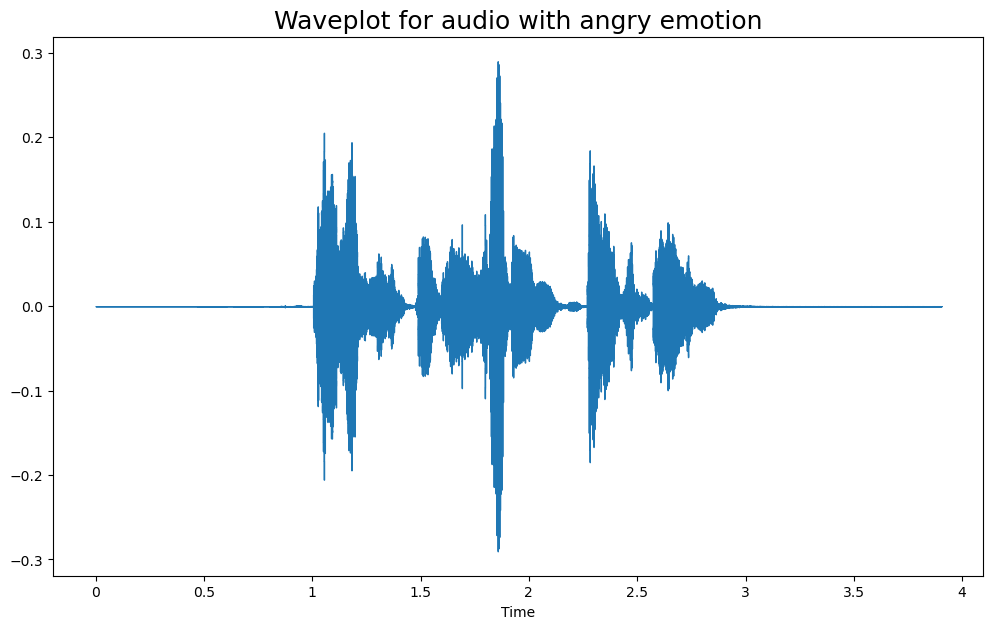

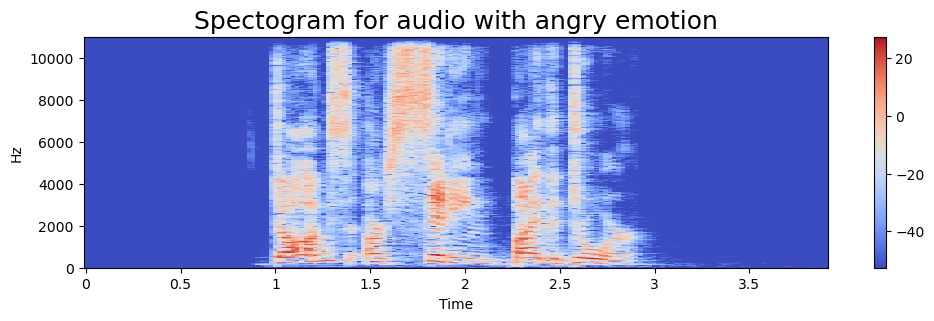

In [15]:
emotion = 'angry'
path = np.array(df.Path[df.Emotions == emotion])[0]
    # load sampling rate as sampling rate and audio features as data
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

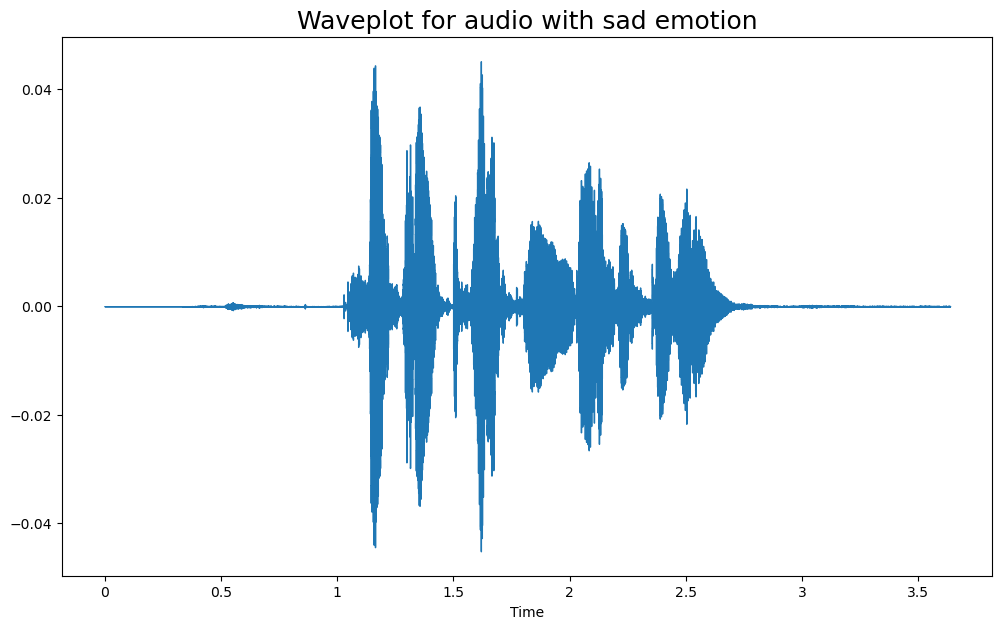

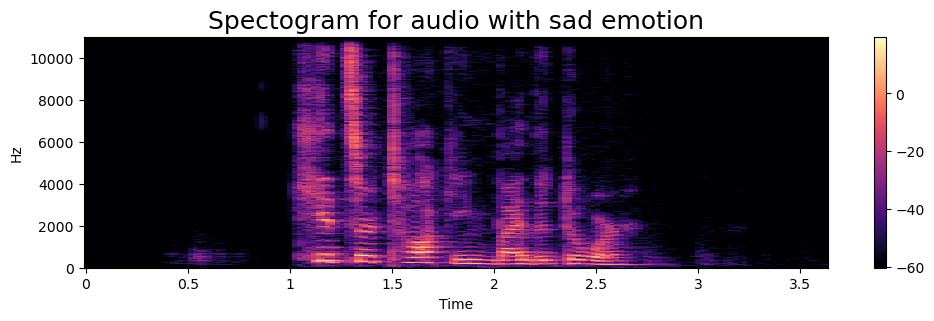

In [16]:
emotion = 'sad'
path = np.array(df.Path[df.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

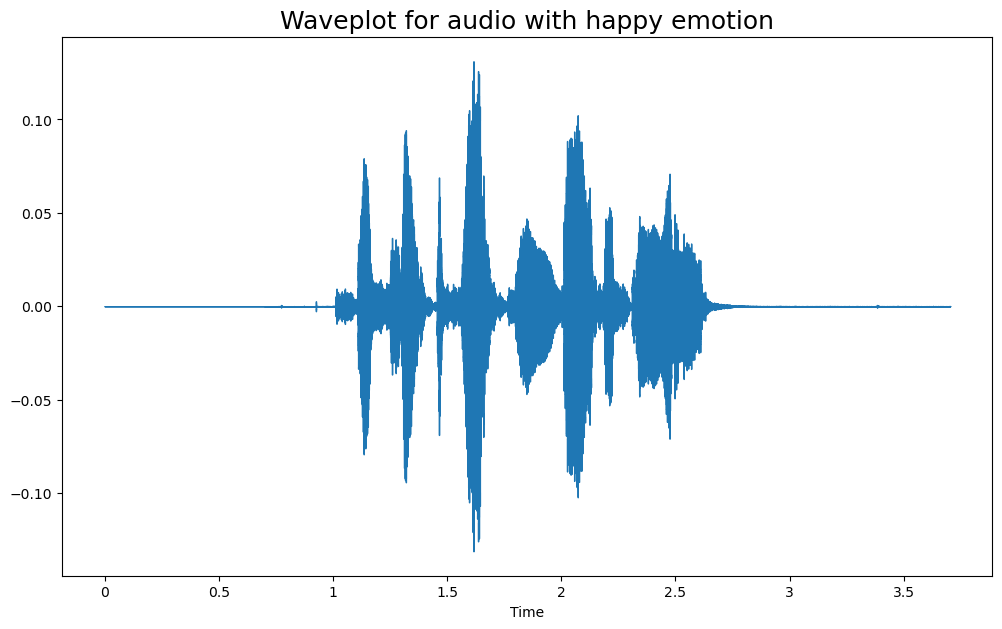

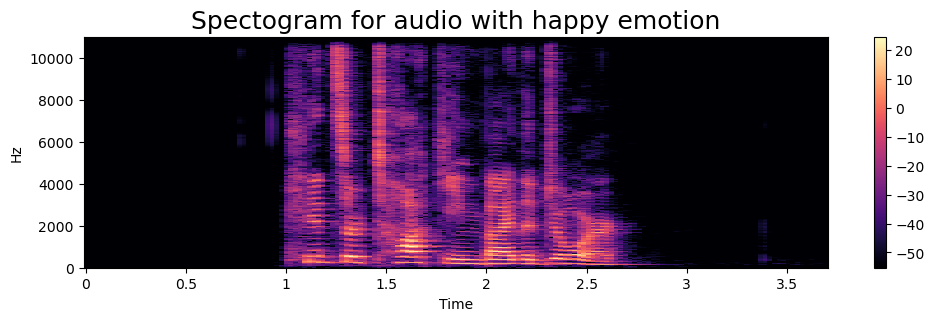

In [17]:
emotion = "happy"
path = np.array(df.Path[df.Emotions == emotion])[4]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

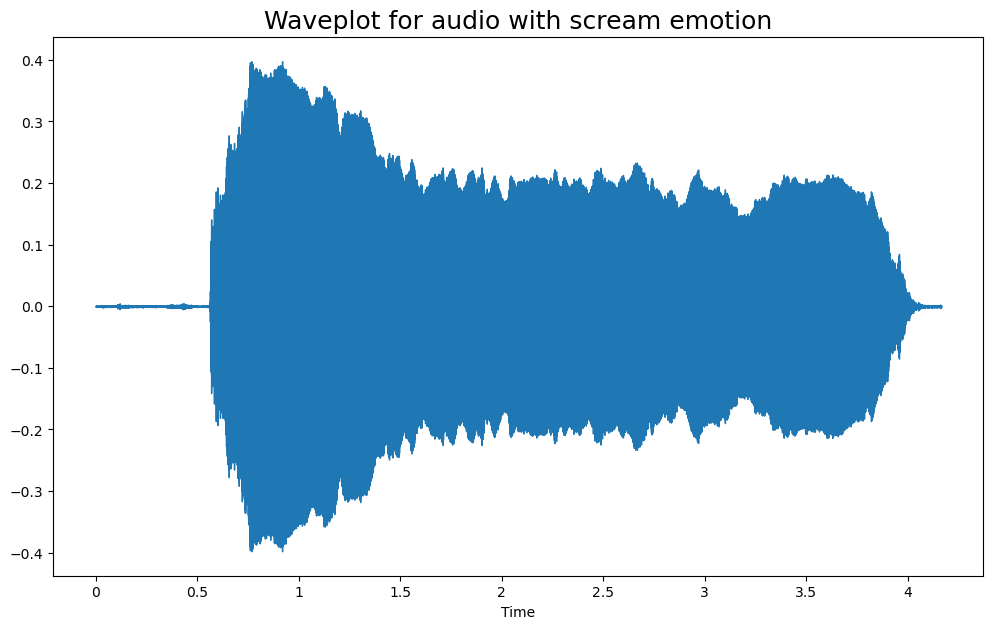

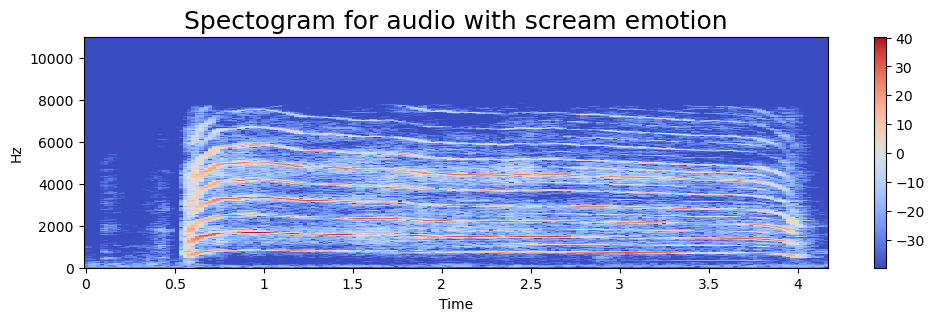

In [27]:
emotion = 'scream'
path = np.array(df.Path[df.Emotions == emotion])[6]
data, sr = librosa.load(path)
create_waveplot(data, sr, emotion)
create_spectogram(data, sr, emotion)
Audio(path)

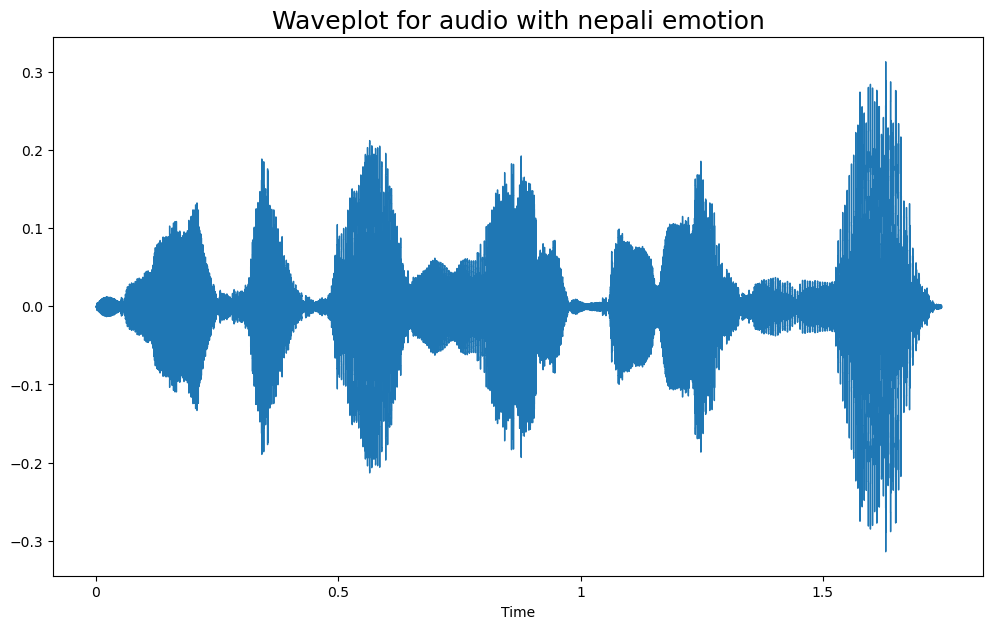

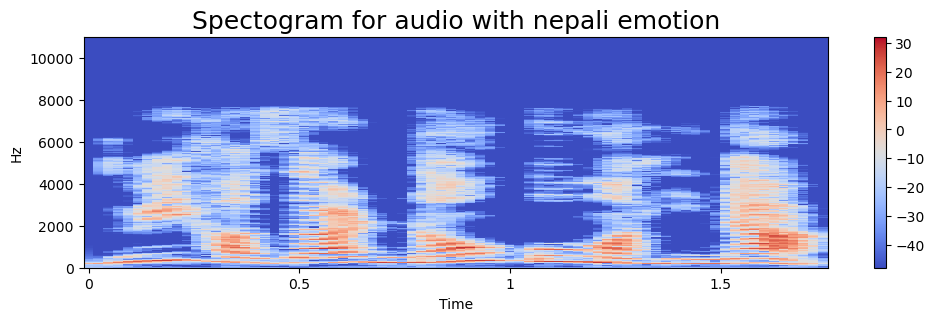

In [28]:
emotion = 'nepali'
path = np.array(df.Path[df.Emotions == emotion])[3]
data, sr = librosa.load(path)
create_waveplot(data, sr, emotion)
create_spectogram(data, sr, emotion)
Audio(path)

    # Data Augmentation
- Data augmentation is the process by which we create new datasamples by adding small features in our intial training set
- we can use noise injection, shifting time, changing pitch and speed
- why ? Our main objective is to add
    - Adding noise (random or structured)
    - Time stretching (speeding up/slowing down)
    - Pitch shifting (changing the pitch)
    - Shifting in time (rolling the waveform left/right)
Volume changes

let's see which augmentation techniques work in our dataset

In [29]:
def noise(data):
    # uniform would generate a random integer and we will multiply by a maximum value in a given array
    adding_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + adding_amp * np.random.normal(size=data.shape[0])
    return data
    

def stretch(data, rate=0.8):
    # stretching time speeding up/slowing down by  rate 0.8
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=-6)

# taking any example and checking for techniques
path = np.array(Ravdess_df.Path)[1]
data, sample_rate = librosa.load(path)

    #1. simple audio

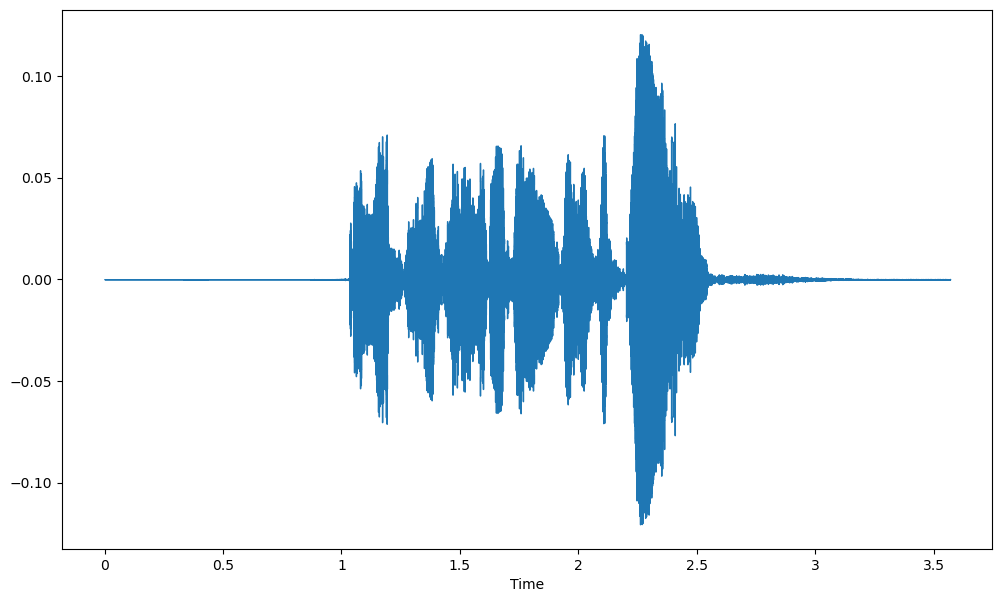

In [30]:
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

    #2. Noise Injection 

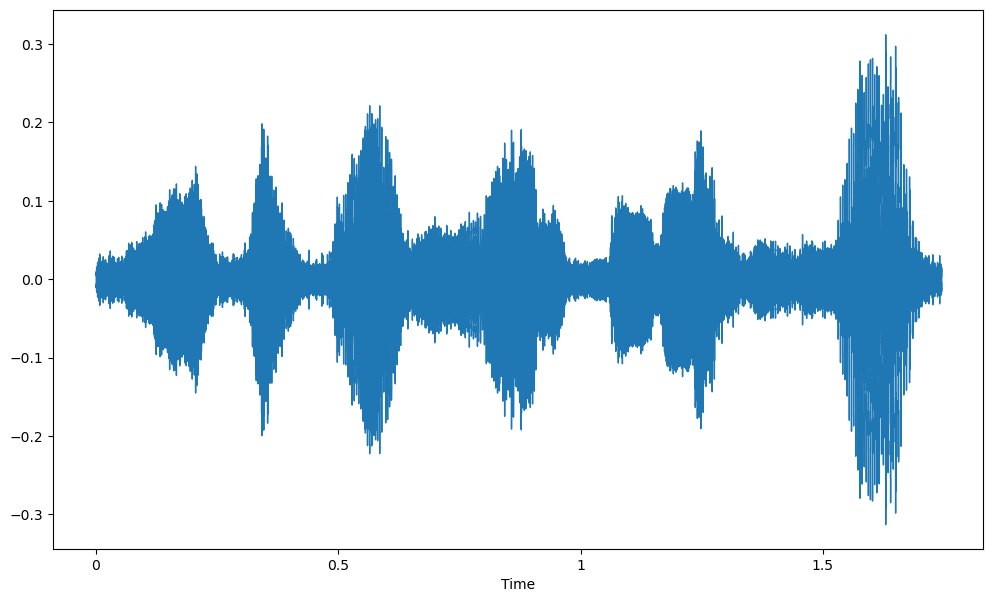

In [31]:

plt.figure(figsize=(12, 7))
path = np.array(df.Path[df.Emotions == 'nepali'])[3]
X, sr = librosa.load(path)
X = noise(X)
librosa.display.waveshow(y=X, sr=sample_rate)
Audio(X, rate=sample_rate)

    # 3. stretching

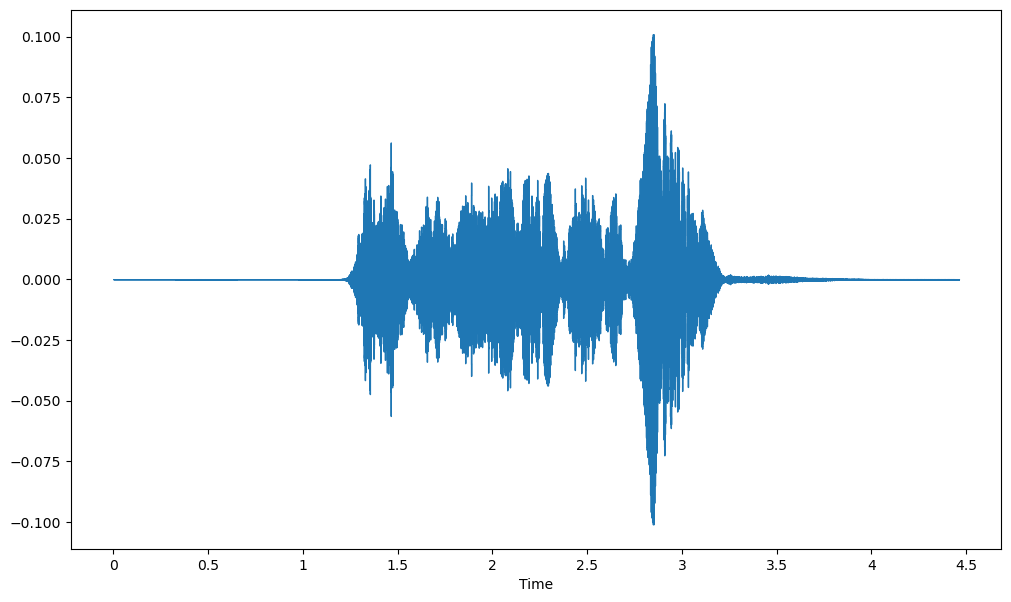

In [33]:
# faced an error
X = stretch(data)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sampling_rate)
Audio(X, rate=sample_rate)

    # shifting 

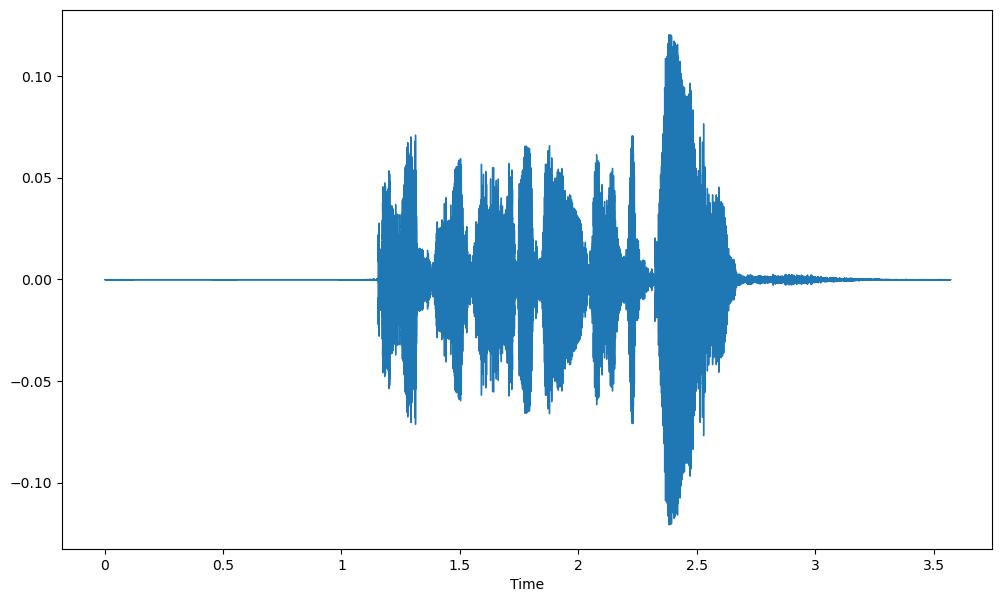

In [34]:
X = shift(data)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sample_rate)
Audio(X, rate=sample_rate)

    # pitching

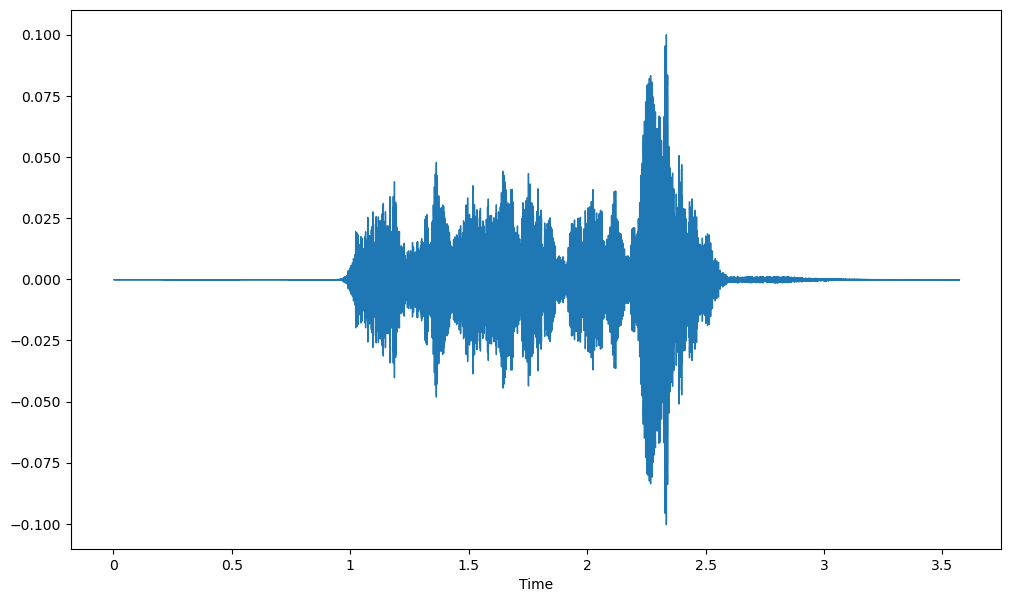

In [35]:
X = pitch(data, sample_rate)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sample_rate)
Audio(X, rate=sampling_rate)

    # Feature Extraction 
- extraction of features is a very important in analyzing and finding relations between different frequency of data. we already know that the data provided of audio could not understood by our model directly.
- The audio signal is a three dimensional signal in which three axes represent time, amplitude and frequency.

I need to convert several trannsformations to extract variable features. but I'm not expert in this field. so, I will try to do most easiest features extraction. you can read this blog for more information. https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225 

1. Zero Crossing Rate: it defines how often audio signal switchs from positive to negative(viceversa) in short time
2. energy: the loudness or strength of the signal in a frame
3. entropy of energy: checks if energy changes a lot within small parts of a frame.
4. special centroid: the center of the sound spectrum, like where most of the sound is concentrated.
5. spectral spread: how spread out of the frequencies are around the spectral centroid.
6. special entropy: how evenly the energy is spread across different frequencie
7. spectral flux: how quickly the sound frequencies change over time
8. spectral rollof: the frequency where most of the signal energy(eg: 90%) below that point
9. MFCCs(Mel Frequency Cepstral Coefficients): special numbers that describe the tone of sound using human hearing scale.
10. chroma vector: shows how much energy each of the 12 musical notes like((C, C#, D, etc).


In [36]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [37]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and end of each files as seen above
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching 
    stretch_data = stretch(data)
    pitch_data = pitch(stretch_data, sample_rate)
    res4 = extract_features(pitch_data)
    result = np.vstack((result, res4))
    return result
    

In [38]:
X, y = [], []
for emotions, path in zip(df.Emotions, df.Path):
    try:
        feature = get_features(path)
        if feature is not None:
            for ele in feature:
                X.append(ele)
                # appending emotion 3 times 
                y.append(emotions)
    except Exception as e:
        print(f"Error processing {path}:{emotions}")

Error processing Converted_Separately/scream/1078.wav:scream
Error processing Converted_Separately/scream/1092.wav:scream
Error processing Converted_Separately/scream/83.wav:scream
Error processing Converted_Separately/scream/91.wav:scream
Error processing Converted_Separately/scream/436.wav:scream
Error processing Converted_Separately/scream/581.wav:scream
Error processing Converted_Separately/scream/479.wav:scream
Error processing Converted_Separately/non_scream/249.wav:non_scream
Error processing Converted_Separately/non_scream/248.wav:non_scream
Error processing Converted_Separately/non_scream/28.wav:non_scream
Error processing Converted_Separately/non_scream/112.wav:non_scream
Error processing Converted_Separately/non_scream/216.wav:non_scream
Error processing Converted_Separately/non_scream/217.wav:non_scream
Error processing Converted_Separately/non_scream/215.wav:non_scream
Error processing Converted_Separately/non_scream/238.wav:non_scream
Error processing Converted_Separately

In [40]:
len(X), len(y), df.Path.shape

(28119, 28119, (9423,))

In [41]:
Features = pd.DataFrame(X)
Features['labels'] = y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.204540  0.529672  0.468962  0.484619  0.554953  0.547627  0.610107   
1  0.353154  0.688767  0.683344  0.701030  0.730658  0.718208  0.713592   
2  0.153042  0.561675  0.545587  0.643797  0.658621  0.651074  0.622025   
3  0.189815  0.560047  0.520643  0.485150  0.440329  0.394749  0.403051   
4  0.317523  0.737313  0.749155  0.725687  0.725441  0.687954  0.635477   

          7         8         9  ...           153           154  \
0  0.558435  0.531272  0.598957  ...  6.682093e-03  4.037453e-03   
1  0.630351  0.641197  0.719600  ...  1.077131e-02  8.266629e-03   
2  0.528290  0.482599  0.499292  ...  4.307269e-14  3.881980e-14   
3  0.411808  0.440498  0.506417  ...  2.600972e-03  2.951629e-03   
4  0.577817  0.575444  0.599244  ...  3.186606e-03  3.522872e-03   

            155           156           157           158           159  \
0  4.854843e-03  4.624051e-03  5.723319e-03  6.006948e-03  6.102507e-03   
1  9.115254e-03  8.791127e-03  9.513868e-03  9.953530e-03  1.048876e-02   
2  3.579320e-14  3.420245e-14  3.232160e-14  3.040603e-14  2.922221e-14   
3  3.851316e-03  3.153920e-03  2.964235e-03  2.586019e-03  2.761169e-03   
4  4.387916e-03  3.717994e-03  3.646717e-03  3.149353e-03  3.332901e-03   

            160           161  labels  
0  5.150128e-03  2.505069e-04   angry  
1  9.179346e-03  4.075257e-03   angry  
2  2.847454e-14  2.804241e-14   angry  
3  1.653332e-03  1.145745e-04    fear  
4  2.225578e-03  6.633605e-04    fear  

[5 rows x 163 columns]

    # Data Prepration
    # I will start training model and preprocessing 

In [42]:
X = Features.iloc[:, :-1].values 
y = Features.iloc[:, -1].values

In [43]:
# As this is a multiclass classification problem so one hot encoding our Y
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()

In [44]:
# splitting the dataset into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22495, 162), (5624, 162), (22495, 11), (5624, 11))

In [45]:
    # scaling the dataset by using StandardScaler sklearn 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22495, 162), (22495, 11), (5624, 162), (5624, 11))

In [46]:
# making our data compatible to model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22495, 162, 1), (5624, 162, 1), (22495, 11), (5624, 11))

In [47]:
model = Sequential()

# adding first layer of neural network with 256 neurons
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

# adding second layer of neural network with 128 neurons 
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

# adding third layer of neural network with 64 neurons
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

# adding fourth layer of neural network with 32 neurons
model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.3))

# adding the flatten layer 
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# adding the dense layer 
model.add(Dense(units=11, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        11,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,459 (892.42 KB)

 Trainable params: 228,459 (892.42 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# This will Reduce learning rate when a metric has stopped moving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, 
                              patience=5, min_lr=0.001)

In [49]:
# This callback will stop training when there is no improvement 
# in the loss for threee consecutive epochs
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=0.0001,
    verbose=1
)

In [50]:
#  fitting the model with the 
history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=[reduce_lr], validation_data=(X_test, y_test))

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 92s 239ms/step - accuracy: 0.6867 - loss: 1.1046 - val_accuracy: 0.8467 - val_loss: 0.4843 - learning_rate: 0.0010
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 94s 266ms/step - accuracy: 0.8388 - loss: 0.5159 - val_accuracy: 0.8707 - val_loss: 0.3847 - learning_rate: 0.0010
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.8608 - loss: 0.4121 - val_accuracy: 0.8898 - val_loss: 0.3314 - learning_rate: 0.0010
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 243ms/step - accuracy: 0.8682 - loss: 0.3826 - val_accuracy: 0.8921 - val_loss: 0.3176 - learning_rate: 0.0010
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.8807 - loss: 0.3471 - val_accuracy: 0.9011 - val_loss: 0.2931 - learning_rate: 0.0010
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 223ms/step - accuracy: 0.8909 - loss: 0.3224 - val_accuracy: 0.9050 - val_loss: 0.2759 - learning_rate: 0.0010
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 222ms/step - accura

176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9292 - loss: 0.2408
Accuracy of our model on test data:  93.56330037117004


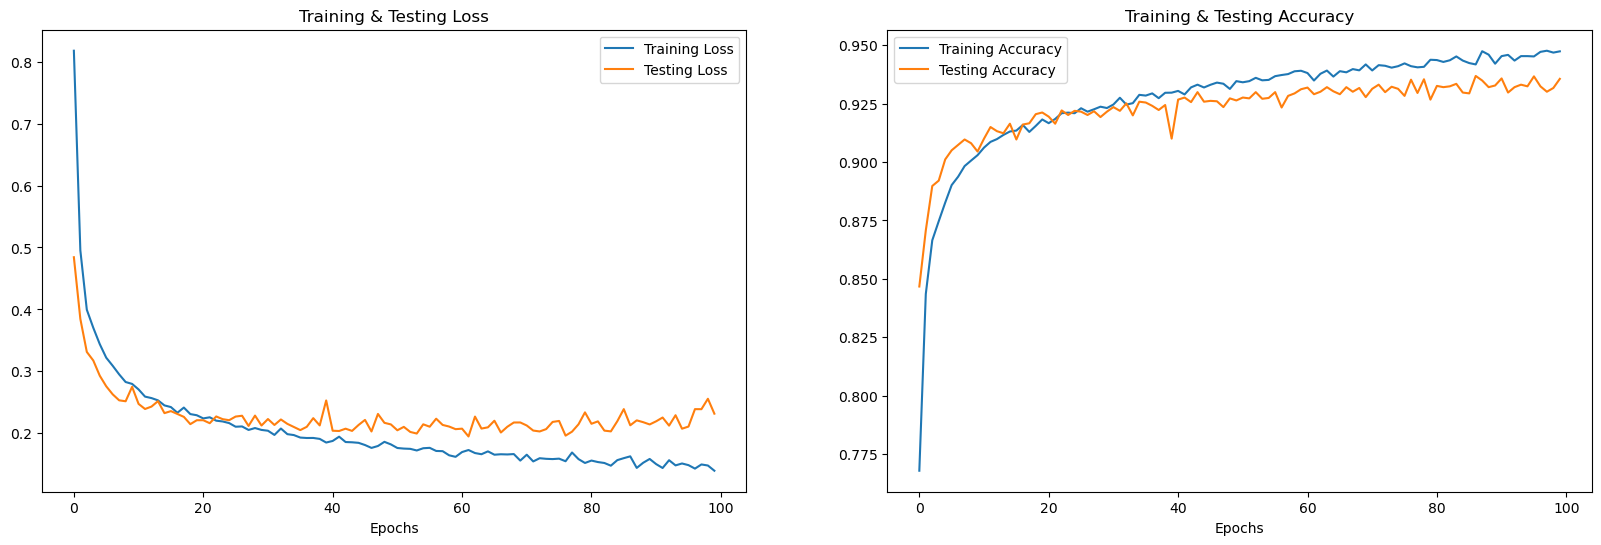

In [51]:
print("Accuracy of our model on test data: ", model.evaluate(X_test, y_test)[1] * 100)

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [52]:
# predicting on test data.
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step


In [53]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          disgust           sad
1       non_scream    non_scream
2           nepali        nepali
3           scream        scream
4           scream        scream
5       non_scream    non_scream
6           scream        nepali
7           scream        scream
8           nepali        nepali
9           scream        scream

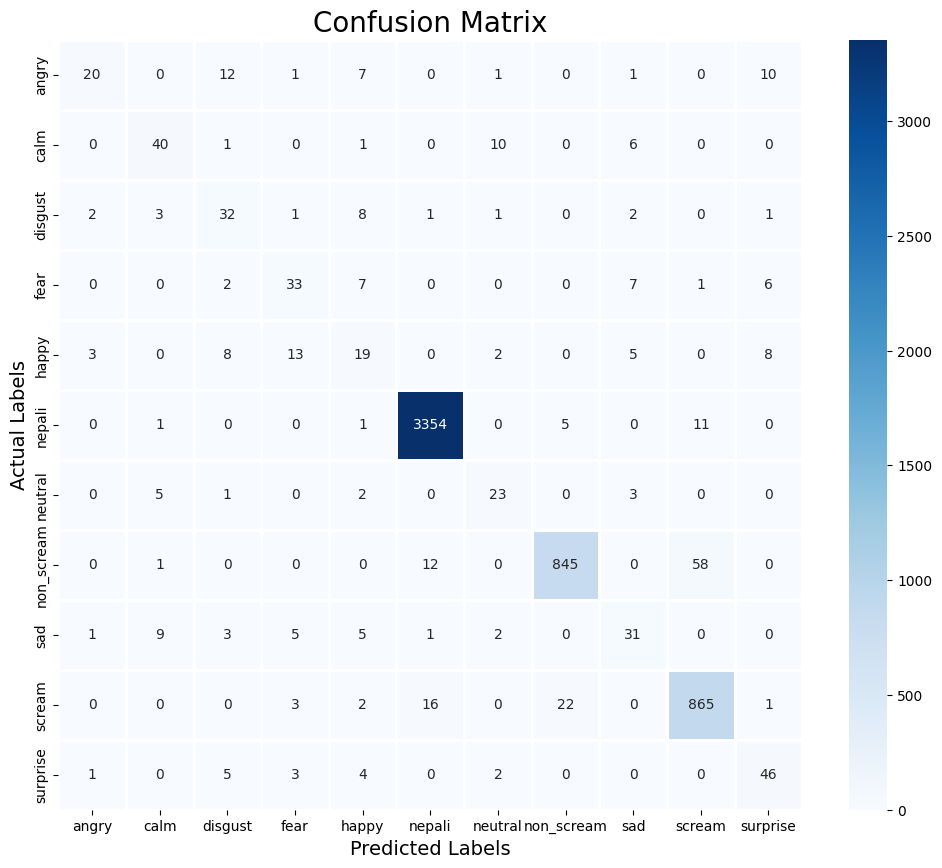

In [118]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.81      0.52      0.63        50
        calm       0.48      1.00      0.65        46
     disgust       0.40      0.51      0.44        63
        fear       0.59      0.37      0.46        62
       happy       0.21      0.16      0.18        50
      nepali       0.99      0.99      0.99      3372
     neutral       0.38      0.21      0.27        24
  non_scream       0.95      0.92      0.93       916
         sad       0.49      0.40      0.44        67
      scream       0.92      0.94      0.93       909
    surprise       0.73      0.74      0.73        65

    accuracy                           0.94      5624
   macro avg       0.63      0.61      0.61      5624
weighted avg       0.94      0.94      0.93      5624



    # we can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ from other files in pitch, speed, stretch.
    # we overall achieved 91 % of accuracy on our test data and its decent score, but overfitting is happening. overfitting is a condition where the model is predicting great in training set but not predicting well in test set. 

#### bye bye guys